In [114]:
import sys, os
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.ticker import NullFormatter

# path of the pysbf folder
sys.path.insert(0, os.getcwd()+"/../../")

from pysbf import *

In [47]:
lkn6_name = "output/u12517sej.lkn6"

In [48]:
likenew = LikeNew(in_folder='data', out_folder='output')

In [49]:
out_dict = likenew.run(delta=1.4, distance=70, verbose=True)

Beta  =	      5.8808e-01 	 #gxy / total sources

Cnorm =	      2.5944e-01 	 GC normalization
Cmax  =	      25.805 		 GC peak magnitude
Delta =	      1.4 		 GC distribution width
Alpha =	      1.240 		 GC log slope vs log r
Total # GC =  333.2

Gamma =	      0.25000 		 Gxy log slope vs m
Gnorm =	      3.00949 		 Gxy count / 1/" @ 34.50
Tnorm =	      0.24315 		 Tyson Gxy count @ 30.13
Total # gxy =  475.8


In [118]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=8, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=4, color='#000033', width=1.2, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=8, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=4, color='#000033', width=1.2, direction=inout) 
        
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=8, width=1.2, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=4, color='#000033', width=1.2, direction=inout)     


        return x_ax, y_ax
    

In [91]:
def eq(lw):
    if "=" in lw:
        for i, w in enumerate(lw):
            if w=="=": break
        return lw[i+1]
    else:
        return None
def beq(lw):
    if "=" in lw:
        for i, w in enumerate(lw):
            if w=="=": break
        return '_'.join(lw[:i])
    else:
        return None
    



In [92]:
def read_lkn6(fname):
    
    with open(fname, "r") as f:
        lines = f.readlines()
    ########################################################################################
    ########################################################################################
    header = {}
    ac = 0

    for i, l in enumerate(lines):
        for w in [',', '(', ')', '/', '#']:
            l = l.replace(w, '')
        words = l.split()
        if words!=[]:
            if words[1] == "lines":
                header['_'.join([w for w in words[1:] if w!="of"])] = int(words[0])
            if words[1] == "points":
                header['_'.join([w for w in words[1:] if w!="rm"])] = int(words[0])            



            if "=" in words:
                if words[0] == "Distance":
                    if "assumed" in words[1:]:
                        header["distance_assumed"] = float(eq(words))
                    if "derived" in words[1:]:
                        header["distance_derived"] = float(eq(words))
                elif words[0] == "Annulus":
                    ac += 1
                    header[beq(words)+str(ac)] = float(eq(words))   
                else:
                    header[beq(words)] = float(eq(words))   

        else:
            break
    ########################################################################################        
    ########################################################################################
    table1 = lines[i+1:]

    E = []
    for e in [x.strip().split() for x in table1[2].strip().split('<r<')]:
        E = E+e
    R_dict = {}
    jj = 1 
    for ii in range(0,len(E),2):
        R_dict['r'+str(jj)] = [E[ii], E[ii+1]]
        jj+=1

    for i1, l in enumerate(table1):
        words = l.split()
        if words[0] == 'r':
            break

    table1 = table1[i1+1:]
    T1 = []
    for i2, row in enumerate(table1):
        if row.split()==[]: break
        r = [float(x) for x in row.split()]
        T1.append(r)

    T1 = np.asarray(T1)

    df1 = pd.DataFrame()

    df1['r'] = T1[:,0]
    df1['frac'] = T1[:,1]

    for idx in [2]:
        df1['N'] = T1[:,idx]
        df1['n_m'] = T1[:,idx+1]
        df1['m'] = T1[:,idx+2]

    jj = 1
    for idx in range(5, T1.shape[1],2):
        df1['N'+str(jj)] = T1[:,idx]
        df1['n_m'+str(jj)] = T1[:,idx+1]
        jj+=1

    ########################################################################################
    ########################################################################################
    table2 = table1[i2+1:]

    columns = table2[2].strip().split()

    jj = 1
    for i in range(2, len(columns), 2):
        columns[i] = columns[i]+'_'+str(jj)
        columns[i+1] = columns[i+1]+'_'+str(jj)
        jj+=1

    T2 = []
    for i3, row in enumerate(table2[3:]):
        if row.split()==[]: break
        r = [float(x) for x in row.split()]
        T2.append(r)

    T2 = np.asarray(T2)

    df2 = pd.DataFrame()

    for i, c in enumerate(columns):
        df2[c] = T2[:,i]

    ########################################################################################
    ########################################################################################
    table3 = table2[i3+6:]

    columns = table3[0].strip().split()
    columns[1] = "m_bright"
    columns[2] = "m_faint"

    T3 = []
    for i4, row in enumerate(table3[1:]):
        if row.split()==[]: break
        r = [float(x) for x in row.split()]
        T3.append(r)

    T3 = np.asarray(T3)

    df3 = pd.DataFrame()

    for i, c in enumerate(columns):
        df3[c] = T3[:,i]
    ########################################################################################
    ########################################################################################
    
    return header, df1, df2, df3, R_dict

In [93]:
header, df1, df2, df3, R_dict = read_lkn6(lkn6_name)

In [94]:
R_dict

{'r1': ['18', '784'],
 'r2': ['18', '125'],
 'r3': ['125', '233'],
 'r4': ['233', '340'],
 'r5': ['340', '447'],
 'r6': ['447', '555']}

In [95]:
df1

,r,frac,N,n_m,m,N1,n_m1,N2,n_m2,N3,n_m3,N4,n_m4,N5,n_m5,N6,n_m6
0,48.7,0.952,24.0,82.62,19.75,1.0,0.52,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
1,97.1,0.923,53.0,77.97,20.25,7.0,3.64,1.0,9.82,0.0,0.00,3.0,8.11,2.0,3.89,0.0,0.00
2,147.7,0.882,54.0,51.22,20.75,3.0,1.56,0.0,0.00,1.0,4.24,0.0,0.00,0.0,0.00,2.0,4.41
3,197.7,0.846,79.0,56.01,21.25,17.0,8.85,0.0,0.00,4.0,16.98,4.0,10.82,5.0,9.73,2.0,4.41
4,248.9,0.846,76.0,41.80,21.75,17.0,8.85,0.0,0.00,6.0,25.47,1.0,2.70,7.0,13.62,2.0,4.41
5,299.5,0.830,92.0,42.08,22.25,25.0,13.01,1.0,9.82,2.0,8.49,7.0,18.93,4.0,7.79,6.0,13.23
6,350.5,0.862,108.0,40.09,22.75,48.0,24.99,5.0,49.10,10.0,42.45,13.0,35.15,8.0,15.57,5.0,11.02
7,401.3,0.845,117.0,38.28,23.25,58.0,30.19,7.0,68.74,10.0,42.45,12.0,32.45,13.0,25.30,9.0,19.84
8,451.3,0.765,125.0,39.73,23.75,86.0,44.77,12.0,117.85,15.0,63.67,11.0,29.74,24.0,46.71,15.0,33.07
9,502.3,0.579,88.0,32.96,24.25,141.0,73.40,30.0,294.62,21.0,89.14,25.0,67.60,33.0,64.23,22.0,48.50


In [96]:
df2

,m,gxy,GC_1,both_1,GC_2,both_2,GC_3,both_3,GC_4,both_4,GC_5,both_5,GC_6,both_6
0,18.0,0.81,0.00,0.81,0.00,0.81,0.00,0.81,0.00,0.81,0.00,0.81,0.00,0.81
1,18.1,0.86,0.00,0.86,0.00,0.86,0.00,0.86,0.00,0.86,0.00,0.86,0.00,0.86
2,18.2,0.91,0.00,0.91,0.00,0.91,0.00,0.91,0.00,0.91,0.00,0.91,0.00,0.91
3,18.3,0.97,0.00,0.97,0.00,0.97,0.00,0.97,0.00,0.97,0.00,0.97,0.00,0.97
4,18.4,1.02,0.00,1.02,0.00,1.02,0.00,1.02,0.00,1.02,0.00,1.02,0.00,1.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,27.5,192.66,26.48,219.14,143.72,336.38,44.52,237.18,24.71,217.37,16.65,209.31,12.47,205.14
96,27.6,204.08,24.23,228.30,131.48,335.56,40.73,244.80,22.61,226.68,15.23,219.31,11.41,215.49
97,27.7,216.17,22.05,238.22,119.67,335.84,37.07,253.24,20.58,236.75,13.86,230.03,10.39,226.56
98,27.8,228.98,19.97,248.95,108.36,337.34,33.57,262.54,18.63,247.61,12.55,241.53,9.41,238.38


In [97]:
df3

,r,m_bright,m_faint,m_gc,m_gxy,m_all,slope,bias
0,9.0,20.0,23.32,26.38,28.58,26.37,0.0,0.0
1,18.0,20.0,23.94,27.21,29.00,27.19,0.0,0.0
2,27.0,20.0,24.29,27.73,29.24,27.70,0.0,0.0
3,36.0,20.0,24.53,28.12,29.41,28.07,0.0,0.0
4,45.0,20.0,24.72,28.42,29.54,28.36,0.0,0.0
...,...,...,...,...,...,...,...,...
95,864.0,20.0,26.46,32.27,30.73,30.70,0.0,0.0
96,873.0,20.0,26.46,32.28,30.73,30.70,0.0,0.0
97,882.0,20.0,26.46,32.29,30.74,30.71,0.0,0.0
98,891.0,20.0,26.46,32.30,30.74,30.71,0.0,0.0


In [98]:
R_dict

{'r1': ['18', '784'],
 'r2': ['18', '125'],
 'r3': ['125', '233'],
 'r4': ['233', '340'],
 'r5': ['340', '447'],
 'r6': ['447', '555']}

In [99]:
out_dict

{'beta': 0.5880764126777649,
 'cnorm': 0.2594362497329712,
 'cmax': 25.804990768432617,
 'alpha': 1.2397639751434326,
 'tot_gc': 333.2461853027344,
 'gamma': 0.25,
 'gnorm': 3.0094876289367676,
 'tnorm': 0.24314643442630768,
 'tot_gal': 475.7538146972656,
 'galpersec': 34.5,
 'tysonempersec': 30.129501342773438,
 'delta': 1.4,
 'status': 10}

In [100]:
header

{'lines_header_information': 31,
 'lines_marginal_counts': 15,
 'lines_predicted_fits': 100,
 'points_originally_present': 984,
 'points_within_fit_limits': 809,
 'distance_assumed': 70.0,
 'distance_derived': 70.0,
 'secpixel': 0.128,
 'Likelihood': 7.35771,
 'Beta': 0.58808,
 'Cnorm': 0.25944,
 'Cmax': 25.80499,
 'Delta': 1.4,
 'Alpha': 1.2398,
 'Total_GC': 333.2,
 'Gamma': 0.25,
 'Gnorm': 3.00949,
 'Tnorm': 0.24315,
 'Total_gxy': 475.8,
 'rlim1': 18.12,
 'rlim2': 554.58386,
 'SN_limit': 4.5,
 'mlim1': 10.719,
 'mlim2': 0.84378,
 'mlim3': 390.0,
 'mlim4': 20.0,
 'Annulus_r1': 84.602,
 'Annulus_r2': 183.69,
 'Annulus_r3': 289.47,
 'Annulus_r4': 395.58,
 'Annulus_r5': 498.0}

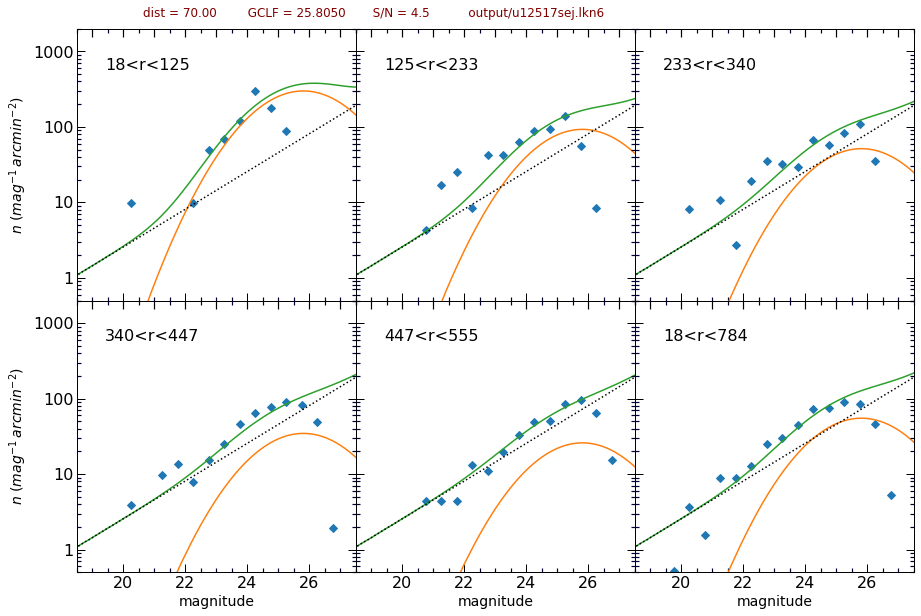

In [119]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for i in range(6):
    
    ii = i%3
    jj = (i-ii)//3
    ax = axes[jj][ii]
       
    idx = (i+1)%6+1
    ax.plot(df1.m, df1["n_m"+str(idx)], 'D')
    ax.plot(df2.m, df2["GC_"+str(idx)], '-')
    ax.plot(df2.m, df2["both_"+str(idx)], '-')
    ax.plot(df2.m, df2.gxy, 'k:')
    
    r1 = R_dict["r"+str(idx)][0]
    r2 = R_dict["r"+str(idx)][1]
    ax.text(0.1, 0.85, r1+"<r<"+r2, fontsize=16, color='k', transform=ax.transAxes)

    ax.set_yscale("log")
    x_ax, y_ax = set_axes(ax, xlim=(18.5,27.5), ylim=(0.5,2000), fontsize=14)
    y_ax.set_yscale("log")

    ax.xaxis.set_tick_params(labelsize=16)
    ax.yaxis.set_tick_params(labelsize=16)
    
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    x_ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    
    
    
    ax.yaxis.set_major_formatter(NullFormatter())  
    ax.yaxis.set_minor_formatter(NullFormatter())
    plt.yticks([1,10,100,1000], ('1', '10', '100','1000'))

    
    plt.setp(y_ax.get_yticklabels(), visible=False)
    if ii>0:
        plt.setp(ax.get_yticklabels(), visible=False)
    else:
        ax.set_ylabel(r"$n \/\/ (mag^{-1} \/ arcmin^{-2})$", fontsize=14)
        
    if jj!=1:
        plt.setp(ax.get_xticklabels(), visible=False)
    else:
        ax.set_xlabel(r"magnitude", fontsize=14)

plt.subplots_adjust(hspace=0, wspace=0)       

s = "dist = %.2f        GCLF = %.4f       S/N = %.1f"%(header["distance_derived"],
                                                       header["Cmax"],
                                                       header["SN_limit"])
_ = plt.suptitle(s + "          "+lkn6_name, fontsize=12, y=0.91, x=0.4, color="maroon")